In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyreadstat

%matplotlib inline # т.н. "магическая команда" jupyter для автоматического отображения графиков, без неё графики открываоись бы в новых окнах
plt.style.use('seaborn-v0_8') #для стилизации графиков

#my_data = pd.read_spss("C:\\DAEFI\\Annual 2005-2011_START.sav")
df, meta = pyreadstat.read_sav("C:\\DAEFI\\Annual 2005-2011_START.sav") # предоставляет информацию о данных (в удобном DataFrame), и метаданных (информацию о переменных, значениях, метках)
print(f"Размер данных: {df.shape}") # размерность DataFrame, возвращает кортеж из количества наблюдений/записей и количество переменных/признаков
print(f"Колонки: {df.columns.tolist()}")

#print 

Размер данных: (2695, 23)
Колонки: ['Cреднеспис.числ.работн', 'k1', 'k2', 'k3', 'k4', 'k4_new', 'k5', 'k6', 'k7', 'k8', 'k9', 'k10', 'k11', 'k12', 'k13', 'k14', 'k15', 'k16', 'k17', 'k18', 'k19', 'k20', 'Year']


In [13]:
file = pd.read_spss("C:\\DAEFI\\Annual 2005-2011_START.sav") # Возвращает обычный pandas DataFrame со всеми данными из SPSS файла
cleaned_file = file.dropna(axis=1) # удаление столбцов с пропущенными значениями 
new_columns =[] # создание новых названий столбцов 
for i in range(len(cleaned_file.columns)): # генерация новых имён 
    new_columns.append(f'column_{i}')
cleaned_file.columns = new_columns
cleaned_file

,column_0,column_1,column_2,column_3,column_4,column_5,column_6,column_7,column_8,column_9,...,column_12,column_13,column_14,column_15,column_16,column_17,column_18,column_19,column_20,column_21
0,6095.0,0.942380,0.060563,0.678302,-0.161531,0.202055,0.165019,0.399033,0.799019,5.426569,...,1.082798,0.655937,4.454819,3.975687,0.892446,1007.536232,0.076738,0.055049,0.034904,5.0
1,255.0,1.980494,0.274382,0.916775,0.624425,0.089377,0.220648,0.000000,0.933519,14.041958,...,1.123828,0.705951,10.618881,12.295547,1.157895,357.294118,0.116068,0.059740,0.025647,5.0
2,114.0,0.374160,0.001494,0.085138,-1.504990,0.235739,0.508929,0.888889,0.779049,5.017007,...,1.185374,0.123415,0.794785,6.258929,7.875000,36.894737,-0.584879,0.010563,0.000000,5.0
3,365.0,7.859079,0.831978,2.449864,0.875862,0.059439,0.030030,0.011111,0.942010,16.244444,...,1.309449,2.804607,48.363889,26.142643,0.540541,33.676983,0.171731,0.496295,0.312415,5.0
4,168.0,1.779376,0.005596,0.883293,0.527853,0.135491,0.886686,0.489796,0.887341,10.558673,...,0.994832,0.473041,5.628827,3.125354,0.555241,19.103896,0.064809,0.025726,0.011839,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2690,217.0,2.292818,0.157246,1.344241,0.488230,0.242939,0.287504,0.037536,0.757061,4.140520,...,1.515589,1.548526,8.469201,6.301110,0.744003,21.593865,0.144724,0.225957,0.190609,11.0
2691,105.0,1.572188,0.163862,1.032772,0.283944,0.169852,0.193680,0.000000,0.830148,6.752174,...,2.291405,1.451423,11.805435,11.071356,0.937819,20.000000,0.056625,0.084859,0.074050,11.0
2692,121.0,1.453574,0.023380,0.692051,0.312040,0.191408,0.361702,0.368349,0.808592,4.313779,...,2.111519,3.087073,16.469304,19.757774,1.199673,81.020134,0.068547,0.199335,0.108159,11.0
2693,243.0,1.310646,0.014829,0.330798,0.044386,0.251739,0.151533,0.027721,0.748261,4.449443,...,3.010763,1.598242,9.503749,25.150932,2.646422,35.840617,0.042199,0.067100,0.052599,11.0


In [16]:
# Создаем функцию для расчета всех характеристик
def calculate_descriptive_stats(df, numeric_columns):
    stats_dict = {}
    
    for col in numeric_columns:
        data = df[col].dropna()  # Убираем пропущенные значения
        
        if len(data) > 0:
            stats_dict[col] = {
                'count': len(data),
                'min': np.min(data),
                'max': np.max(data),
                'range': np.max(data) - np.min(data),
                'mean': np.mean(data),
                'variance': np.var(data, ddof=1),  # несмещенная дисперсия
                'std_dev': np.std(data, ddof=1),   # несмещенное стандартное отклонение
                'median': np.median(data),
                'q_0.01': np.quantile(data, 0.01),
                'q_0.05': np.quantile(data, 0.05),
                'q_0.95': np.quantile(data, 0.95),
                'q_0.99': np.quantile(data, 0.99)
            }
    
    return pd.DataFrame(stats_dict).T

# Расчет статистик
descriptive_stats = calculate_descriptive_stats(cleaned_file, numeric_columns)

# Отображаем результаты
print("ОПИСАТЕЛЬНЫЕ СТАТИСТИКИ ДЛЯ ВСЕХ ЧИСЛОВЫХ ПЕРЕМЕННЫХ")
print("=" * 100)
descriptive_stats

ОПИСАТЕЛЬНЫЕ СТАТИСТИКИ ДЛЯ ВСЕХ ЧИСЛОВЫХ ПЕРЕМЕННЫХ


,count,min,max,range,mean,variance,std_dev,median,q_0.01,q_0.05,q_0.95,q_0.99
column_0,2695.0,10.000000,28650.000000,28640.000000,1220.773284,6.535214e+06,2556.406482,473.000000,36.940000,91.000000,5152.400000,12526.780000
column_1,2695.0,0.248322,18.020148,17.771826,2.002089,2.856275e+00,1.690052,1.473859,0.423381,0.663925,5.258034,9.002944
column_2,2695.0,0.000000,7.029135,7.029135,0.238018,2.680105e-01,0.517697,0.055551,0.000340,0.002725,1.128667,2.636539
column_3,2695.0,0.008329,11.187699,11.179370,0.825098,8.432594e-01,0.918292,0.538349,0.061415,0.124851,2.544703,4.917381
column_4,2695.0,-4.569874,0.935935,5.505809,0.038115,3.908187e-01,0.625155,0.148620,-2.450093,-0.977473,0.755809,0.881929
column_5,2695.0,0.009944,1.083702,1.073758,0.346330,3.920708e-02,0.198008,0.319908,0.037373,0.068282,0.712523,0.860138
column_6,2695.0,0.000000,1.000000,1.000000,0.238031,4.540896e-02,0.213094,0.185185,0.000000,0.000000,0.663608,0.859919
column_7,2695.0,0.000000,1.000000,1.000000,0.174212,4.984752e-02,0.223266,0.075676,0.000000,0.000000,0.674139,0.890017
column_8,2695.0,0.053766,0.990056,0.936290,0.655964,3.832761e-02,0.195774,0.681890,0.160895,0.292537,0.932723,0.962348
column_9,2695.0,0.059320,199.605839,199.546520,6.862756,6.309532e+01,7.943256,4.758963,0.455832,1.048860,19.642377,35.671475


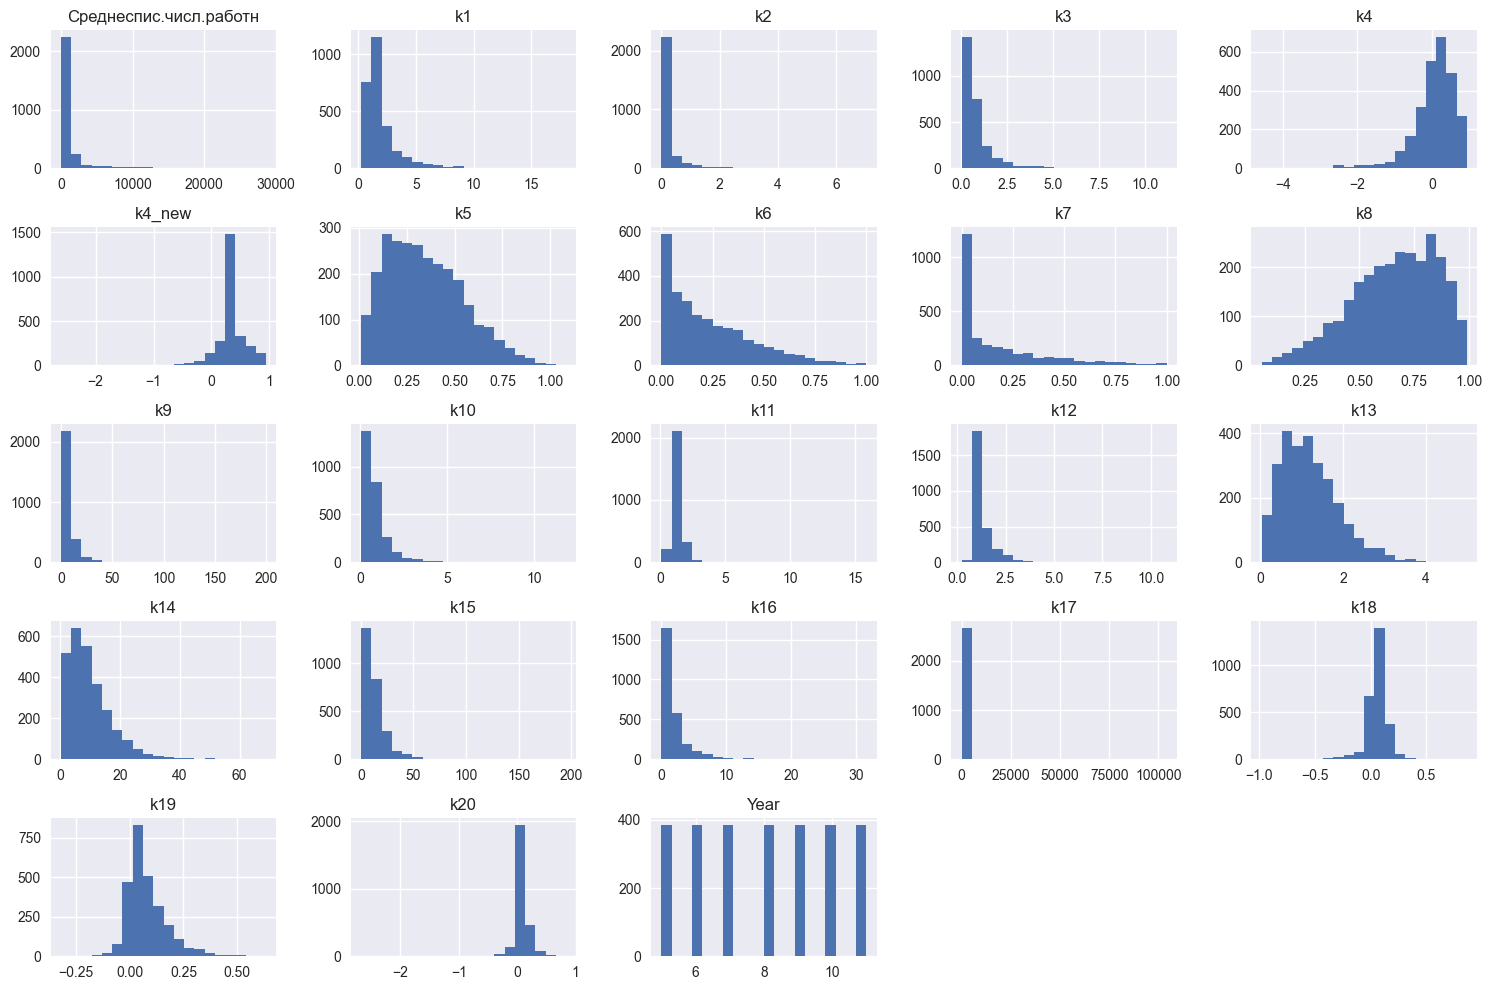

In [26]:
# Гистограмма для числовых переменных
df_filled.select_dtypes(include=[np.number]).hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()


In [22]:
# Анализ распределения через сравнение квантилей
print("АНАЛИЗ РАСПРЕДЕЛЕНИЯ ЧЕРЕЗ КВАНТИЛИ")
print("=" * 100)

for col in numeric_columns:
    if col in descriptive_stats.index:
        stats = descriptive_stats.loc[col]
        
        # Анализ симметрии распределения
        q1_to_median = stats['median'] - stats['q_0.05']
        median_to_q3 = stats['q_0.95'] - stats['median']
        symmetry_ratio = median_to_q3 / q1_to_median if q1_to_median != 0 else np.inf

        print(f"\n|-| {col}:")
        print(f"   Интервал 90% данных: [{stats['q_0.05']:.4f}, {stats['q_0.95']:.4f}]")
        print(f"   Интервал 98% данных: [{stats['q_0.01']:.4f}, {stats['q_0.99']:.4f}]")
        print(f"   Отношение (Q95-median)/(median-Q05): {symmetry_ratio:.4f}")
        
        if symmetry_ratio > 1.5:
            print("   !  Распределение скошено вправо")
        elif symmetry_ratio < 0.67:
            print("   !  Распределение скошено влево")
        else:
            print("   + Распределение относительно симметрично")

АНАЛИЗ РАСПРЕДЕЛЕНИЯ ЧЕРЕЗ КВАНТИЛИ

|-| column_0:
   Интервал 90% данных: [91.0000, 5152.4000]
   Интервал 98% данных: [36.9400, 12526.7800]
   Отношение (Q95-median)/(median-Q05): 12.2497
   !  Распределение скошено вправо

|-| column_1:
   Интервал 90% данных: [0.6639, 5.2580]
   Интервал 98% данных: [0.4234, 9.0029]
   Отношение (Q95-median)/(median-Q05): 4.6722
   !  Распределение скошено вправо

|-| column_2:
   Интервал 90% данных: [0.0027, 1.1287]
   Интервал 98% данных: [0.0003, 2.6365]
   Отношение (Q95-median)/(median-Q05): 20.3139
   !  Распределение скошено вправо

|-| column_3:
   Интервал 90% данных: [0.1249, 2.5447]
   Интервал 98% данных: [0.0614, 4.9174]
   Отношение (Q95-median)/(median-Q05): 4.8522
   !  Распределение скошено вправо

|-| column_4:
   Интервал 90% данных: [-0.9775, 0.7558]
   Интервал 98% данных: [-2.4501, 0.8819]
   Отношение (Q95-median)/(median-Q05): 0.5392
   !  Распределение скошено влево

|-| column_5:
   Интервал 90% данных: [0.0683, 0.7125]
 

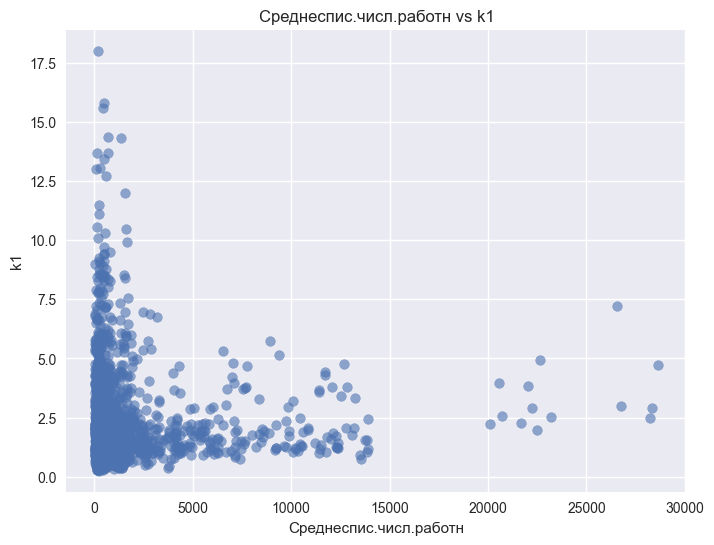

In [10]:
# Пример точечной диаграммы для двух переменных
if len(df_filled.select_dtypes(include=[np.number]).columns) >= 2:
    numeric_cols = df_filled.select_dtypes(include=[np.number]).columns
    plt.figure(figsize=(8, 6))
    plt.scatter(df_filled[numeric_cols[0]], df_filled[numeric_cols[1]], alpha=0.6)
    plt.xlabel(numeric_cols[0])
    plt.ylabel(numeric_cols[1])
    plt.title(f'{numeric_cols[0]} vs {numeric_cols[1]}')
    plt.show()

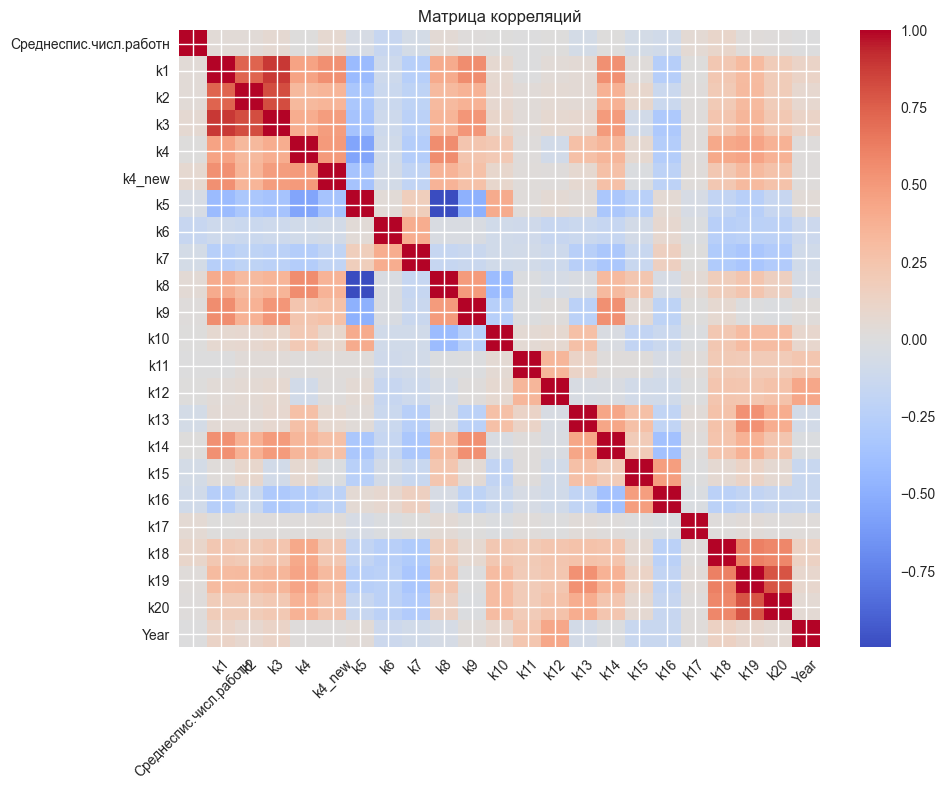

Матрица корреляций:
                        Cреднеспис.числ.работн        k1        k2        k3  \
Cреднеспис.числ.работн                1.000000  0.035067  0.039541  0.057712   
k1                                    0.035067  1.000000  0.732549  0.883032   
k2                                    0.039541  0.732549  1.000000  0.812905   
k3                                    0.057712  0.883032  0.812905  1.000000   
k4                                    0.008973  0.452525  0.327937  0.398493   
k4_new                                0.066323  0.541202  0.347799  0.483831   
k5                                   -0.045174 -0.412064 -0.318344 -0.355593   
k6                                   -0.148917 -0.113531 -0.123917 -0.110743   
k7                                   -0.063621 -0.248283 -0.208498 -0.227242   
k8                                    0.044002  0.405975  0.317151  0.350851   
k9                                    0.014358  0.557893  0.368025  0.510083   
k10                 

In [11]:
# Матрица корреляций
numeric_df = df_filled.select_dtypes(include=[np.number])

if not numeric_df.empty:
    corr_matrix = numeric_df.corr()
    
    # Тепловая карта корреляций
    plt.figure(figsize=(10, 8))
    plt.imshow(corr_matrix, cmap='coolwarm', aspect='auto')
    plt.colorbar()
    plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
    plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
    plt.title('Матрица корреляций')
    plt.tight_layout()
    plt.show()
    
    # Вывод числовых значений корреляций
    print("Матрица корреляций:")
    print(corr_matrix)